<a href="https://colab.research.google.com/github/Igggonzalez/Grupo-20/blob/main/Tp2BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import files
uploaded = files.upload()

Saving Individual_t104.dta to Individual_t104 (1).dta


In [52]:
from google.colab import files
uploaded = files.upload()

Saving usu_individual_T124.xlsx to usu_individual_T124 (3).xlsx


In [56]:
import pandas as pd
df_2004 = pd.read_stata("Individual_t104 (1).dta")
df_2024 = pd.read_excel("usu_individual_T124 (3).xlsx")
print(df_2004.head())
print(df_2024.head())

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [58]:
#punto 2a
df_2004_gba = df_2004[df_2004["region"] == "Gran Buenos Aires"]
df_2024_gba = df_2024[df_2024["REGION"] == "Gran Buenos Aires"]

df_a = pd.read_stata("Individual_t104 (1).dta")
print(df_a.shape)
df_b = pd.read_excel("usu_individual_T124 (3).xlsx")
print(df_b.shape)
df_a_gba = df_a[df_a["region"] == "Gran Buenos Aires"]
df_b_gba = df_b[df_b["REGION"] == "Gran Buenos Aires"]
df = pd.concat([df_a_gba, df_b_gba])
print(df.shape)


(45289, 176)
(46050, 177)
(7647, 352)


In [59]:
#punto 2b
variables_2004=['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'deccfr',
 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'pj1_1', 'pj2_1', 'pj3_1', 'idimpp']
variables_2024= ['GDECCFR' , 'PDECCFR','CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE',
                 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05']
faltantes_2004=df_a[variables_2004].isna().sum()
faltantes_2024=df_b[variables_2024].isna().sum()

print("valores faltantes - año 2004")
print(faltantes_2004)
print("valores faltantes - año 2024")
print(faltantes_2024)


valores faltantes - año 2004
CODUSU        0
nro_hogar     0
componente    0
h15           0
ano4          0
deccfr        0
ideccfr       0
rdeccfr       0
gdeccfr       0
pdeccfr       0
adeccfr       0
pj1_1         0
pj2_1         0
pj3_1         0
idimpp        0
dtype: int64
valores faltantes - año 2024
GDECCFR       24408
PDECCFR       21642
CODUSU            0
ANO4              0
TRIMESTRE         0
NRO_HOGAR         0
COMPONENTE        0
H15               0
REGION            0
MAS_500           0
AGLOMERADO        0
PONDERA           0
CH03              0
CH04              0
CH05              0
dtype: int64


In [60]:
#punto 2c
valores_invalidos = [9, 99, 999, 99999, -7, -8, -9, 0]
import numpy as np
for var in variables_2024:
    df[var] = df[var].replace(valores_invalidos, np.nan)
faltantes_limpios = df[variables_2024].isna().sum()
print("Valores faltantes después de limpieza(2024):")
print(faltantes_limpios)
for var in variables_2004:
    df[var] = df[var].replace(valores_invalidos, np.nan)
faltantes_limpios = df[variables_2004].isna().sum()
print("Valores faltantes después de limpieza(2004):")
print(faltantes_limpios)

Valores faltantes después de limpieza(2024):
GDECCFR       7647
PDECCFR       7647
CODUSU           0
ANO4          7647
TRIMESTRE     7647
NRO_HOGAR     7647
COMPONENTE    7647
H15           7647
REGION        7647
MAS_500       7647
AGLOMERADO    7647
PONDERA       7647
CH03          7647
CH04          7647
CH05          7647
dtype: int64
Valores faltantes después de limpieza(2004):
CODUSU           0
nro_hogar        0
componente      35
h15           1230
ano4             0
deccfr           0
ideccfr          0
rdeccfr          0
gdeccfr          0
pdeccfr          0
adeccfr          0
pj1_1         7488
pj2_1         7595
pj3_1         7613
idimpp           0
dtype: int64


<ipython-input-60-25f929dace52>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[var] = df[var].replace(valores_invalidos, np.nan)
<ipython-input-60-25f929dace52>:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[var] = df[var].replace(valores_invalidos, np.nan)


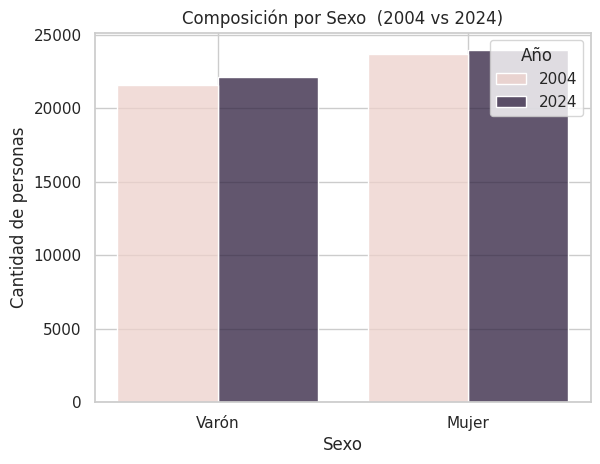

In [61]:
#punto 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_2004 = df_a.copy()
df_2024 = df_b.copy()
df_2004['Sexo'] = df_2004['ch04'].replace({1: 'Varón', 2: 'Mujer'})
df_2024['Sexo'] = df_2024['CH04'].replace({1: 'Varón', 2: 'Mujer'})
df_2004['Año'] = 2004
df_2024['Año'] = 2024
df_union = pd.concat([df_2004[['Sexo', 'Año']], df_2024[['Sexo', 'Año']]])
sns.set(style="whitegrid")
sns.histplot(data=df_union, x='Sexo', hue='Año', multiple='dodge', shrink=0.8, discrete=True)
plt.title("Composición por Sexo  (2004 vs 2024)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de personas")
plt.show()

In [28]:
#punto4

In [100]:
# --- PUNTO 4: Matriz de correlación para 2004 y 2024 ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Estándarizo nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

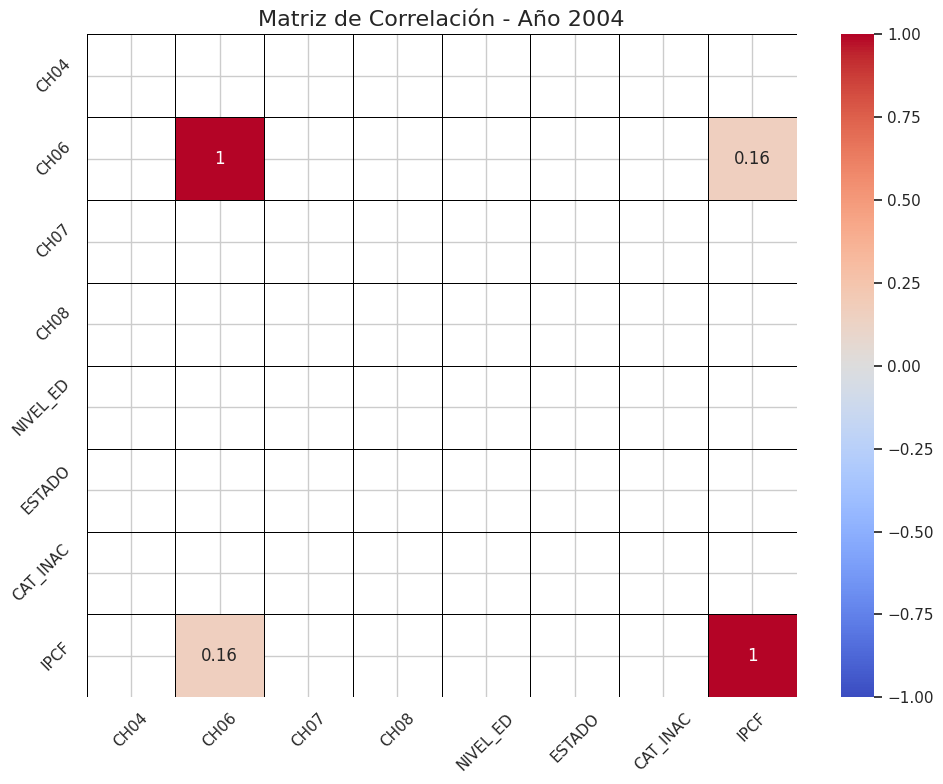

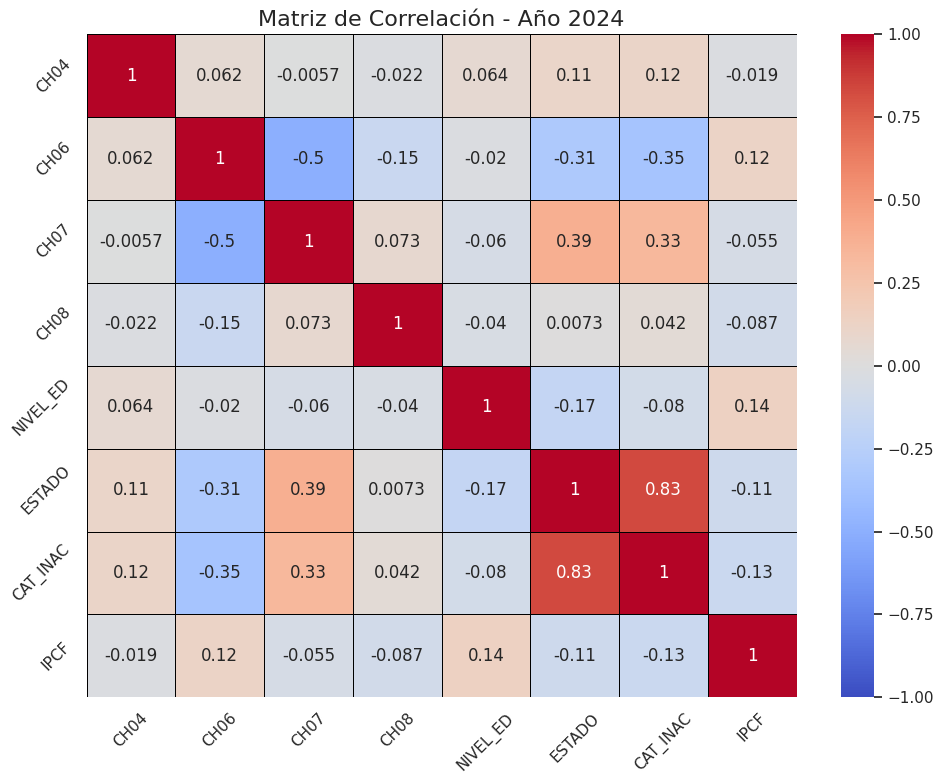

In [101]:
# Uniformizar nombres de columnas (es fundamental que no tenga errores)
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Variables pedidas/consignas del TP
variables_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Verificamos que existan esas variables en cada dataset
vars_2004 = [var for var in variables_corr if var in df_2004.columns]
vars_2024 = [var for var in variables_corr if var in df_2024.columns]

# Seleccionamos las variables correspondientes
df_corr_2004 = df_2004[vars_2004]
df_corr_2024 = df_2024[vars_2024]

# Aseguramos que todas las columnas sean numéricas
df_corr_2004 = df_corr_2004.apply(pd.to_numeric, errors='coerce')
df_corr_2024 = df_corr_2024.apply(pd.to_numeric, errors='coerce')

# Calculamos las matrices de correlación
corr_matrix_2004 = df_corr_2004.corr()
corr_matrix_2024 = df_corr_2024.corr()

#GRAFICO MATRIZ DE CORRELACION 2004

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix_2004,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black',
    vmin=-1, vmax=1
)
plt.title('Matriz de Correlación - Año 2004', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# --- GRAFICO MATRIZ DE CORRELACION 2024 ---

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix_2024,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black',
    vmin=-1, vmax=1
)
plt.title('Matriz de Correlación - Año 2024', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
#Punto5

In [103]:
# --- PUNTO 5: Análisis de desocupados e inactivos
# Asegurarnos que los nombres de columnas estén en mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [104]:
# ---- Para año 2004 ----

# Cantidad de desocupados e inactivos
cantidad_desocupados_2004 = df_2004[df_2004['ESTADO'] == 2].shape[0]
cantidad_inactivos_2004 = df_2004[df_2004['ESTADO'] == 3].shape[0]

print(f"Año 2004:")
print(f"Cantidad de desocupados: {cantidad_desocupados_2004}")
print(f"Cantidad de inactivos: {cantidad_inactivos_2004}")

# Media de ingreso per cápita familiar por estado
media_ingreso_2004 = df_2004.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (2004):")
print(media_ingreso_2004)

Año 2004:
Cantidad de desocupados: 0
Cantidad de inactivos: 0

Media de IPCF por estado (2004):
ESTADO
Entrevista individual no realizada (no respuesta al cuestion    107.955782
Ocupado                                                         368.184033
Desocupado                                                      187.322422
Inactivo                                                        265.826881
Menor de 10 años                                                196.084341
Name: IPCF, dtype: float64


<ipython-input-104-96f97bec2499>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_ingreso_2004 = df_2004.groupby('ESTADO')['IPCF'].mean()


In [105]:
# ---- Para año 2024 ----

# Cantidad de desocupados e inactivos
cantidad_desocupados_2024 = df_2024[df_2024['ESTADO'] == 2].shape[0]
cantidad_inactivos_2024 = df_2024[df_2024['ESTADO'] == 3].shape[0]

print(f"\nAño 2024:")
print(f"Cantidad de desocupados: {cantidad_desocupados_2024}")
print(f"Cantidad de inactivos: {cantidad_inactivos_2024}")

# Media de ingreso per cápita familiar por estado
media_ingreso_2024 = df_2024.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (2024):")
print(media_ingreso_2024)


Año 2024:
Cantidad de desocupados: 1362
Cantidad de inactivos: 18724

Media de IPCF por estado (2024):
ESTADO
0         0.000000
1    189935.804812
2     97985.469567
3    141970.998369
4    114414.638143
Name: IPCF, dtype: float64


In [ ]:
#Punto6

In [106]:
# Aseguramos columnas en mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [112]:
# Año 2004

#Quien respndío.
respondieron_2004 = df_2004[df_2004['ESTADO'] != 0]
norespondieron_2004 = df_2004[df_2004['ESTADO'] == 0]

# Cantidad/Cuantos
print(f"Año 2004:")
print(f"Cantidad de personas que NO respondieron condición de actividad: {norespondieron_2004.shape[0]}")
print(f"Cantidad de personas que respondieron: {respondieron_2004.shape[0]}")

Año 2004:
Cantidad de personas que NO respondieron condición de actividad: 0
Cantidad de personas que respondieron: 45289


In [111]:
#2024
#Respondieron
respondieron_2024 = df_2024[df_2024['ESTADO'] != 0]
norespondieron_2024 = df_2024[df_2024['ESTADO'] == 0]

# Cantidad
print(f"\nAño 2024:")
print(f"Cantidad de personas que NO respondieron condición de actividad: {norespondieron_2024.shape[0]}")
print(f"Cantidad de personas que respondieron: {respondieron_2024.shape[0]}")


Año 2024:
Cantidad de personas que NO respondieron condición de actividad: 81
Cantidad de personas que respondieron: 45969
